# Exploratory Data Analytics / Root Cause Analytics

1. Domain exploration
    - Understand the buisness process, understand the mindset of stakeholders on shopfloor
    - Understand common challenges,  business beleif, recent development in business
    - understand process of data collection, sources of data, common possible issues with data
    - Understand data lifecycle, business lifecycle
    
    
2. Data collection and exploration
    - collect data from multiple sources, build a dataset
    - perform common exploration to understand overall data quality
    
    
3. Data Cleaning
    - Handle missing values
    - Handle duplicated entrie
    - Handle outliers, unwanted columns
    

4. Exploratory Data Analytics / Root Cause Analytics
    - Data Visualization
        - Unvariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
        
      
     - Statistical Research techniques
         - Correlation Analysis
         - ANOVA - f test
         - Chi Square test
         
5. Prepare the report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Collection and Exploration

In [2]:
df = pd.read_csv(r"D:\AI\data\datasets-1\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9985.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     5.013721   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.892213   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count      9990.000000  10000.000000  
mean     100127.441333      0.203700  
std       57497.228065      0.402769  
min          11.580000      0.000000  
25%       51112.885000      0.000000  
50%      100238.110000      0.000000  
75%      149400.922500      0.000000  
max      199992.480000      1.000000

Observation

    - unwanted columns: RowNumber, CustomerId, Surname
    - Target: Exited
    - Demographhic info: Age, Geography, Gender
    - financial information: CrediScore, Balance, EstimatedSalary
    - Relation with bank: Tenure, NumOfProducts, IsActiveMember
    - atleast 25% of customers have 0 balance in account

## 3. Data Cleaning

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [7]:
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_19124/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

In [8]:
df.EstimatedSalary.fillna(df.EstimatedSalary.mean(),inplace=True)
df.Tenure.fillna(df.Tenure.mean(),inplace=True)

In [9]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# check for outliers
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_19124/3256115495.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

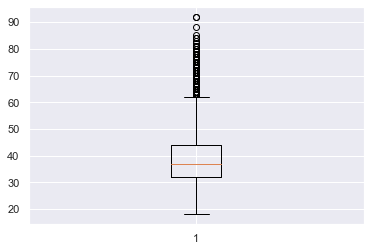

In [11]:
sns.set_theme()
plt.boxplot(df.Age)
plt.show()

In [12]:
sum(df.Age>62)

359

In [13]:
thresh = df.Age.quantile(0.99)
df.Age[df.Age>thresh] = thresh

C:\Users\admin\AppData\Local\Temp/ipykernel_19124/925322517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age>thresh] = thresh


In [14]:
df.Age.skew()

0.9140946314454033

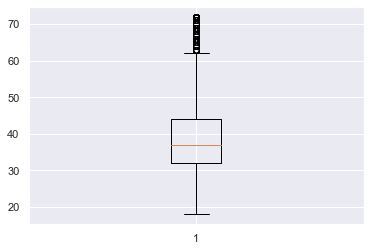

In [15]:
sns.set_theme()
plt.boxplot(df.Age)
plt.show()

In [16]:
# drop unwanted cols
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
df.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42     2.0      0.00              1   
1          608     Spain  Female   41     1.0  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0

## 4. Exploratory Data ANalysis
### Data Visualization
#### Univaraite ANalysis

    - Analyze only one variable at a time, we do not relate it to the target attribute
    - NUmeric: histogram - continuous frequency distribution 
    - categoric: barplot / countplot - discrete frequency distribution

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [18]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


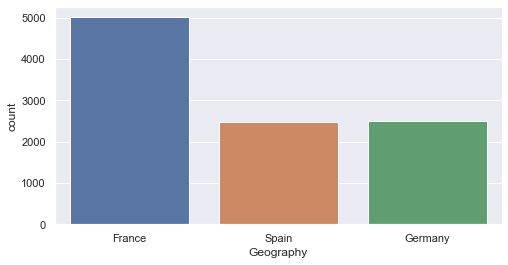

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


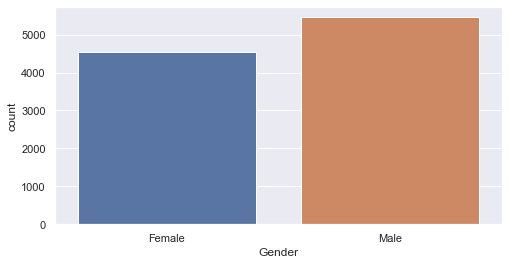

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


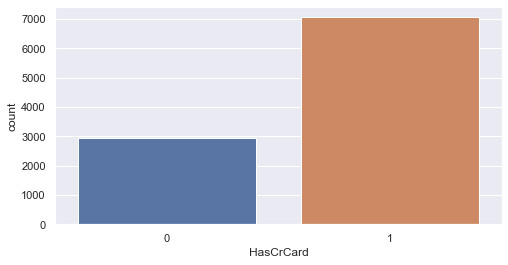

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


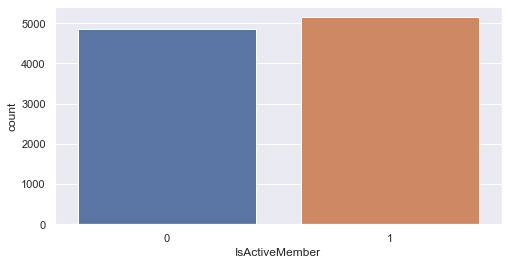

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


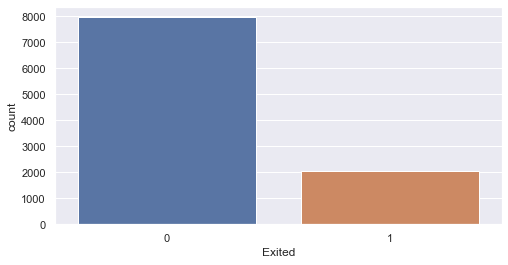

In [19]:
for col in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

Observations:

    - Geography: almost 50% of customers are from France, rest are from spain and germany
    - Gender: 55% of customers are male, rest are female
    - HasCrcard: approx 70% of the customers have creditcard
    - IsActiveMember: approx 50% of customers are not using banking products/services actively - RED FLAG
    - Exited: almost 20% of customers left the bank

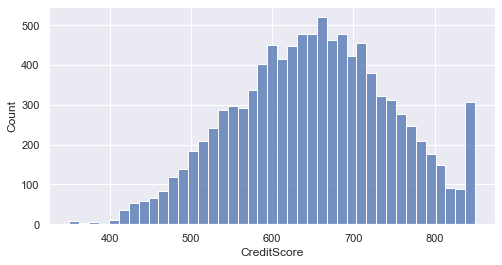

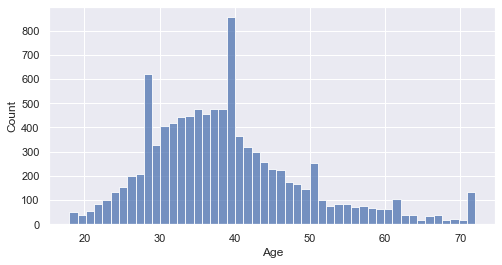

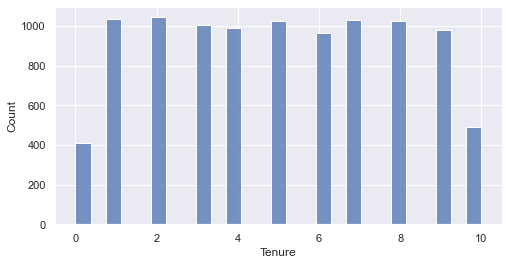

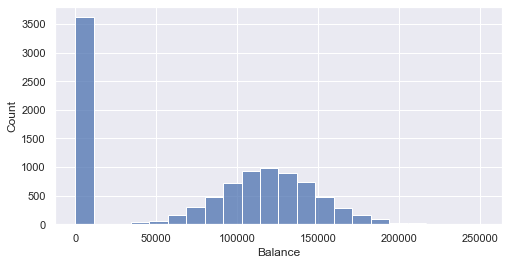

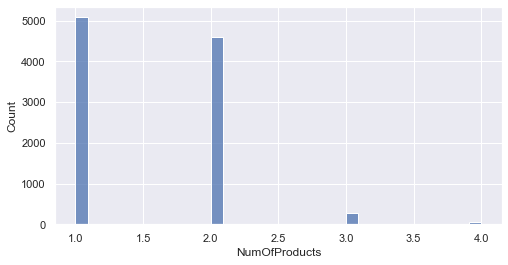

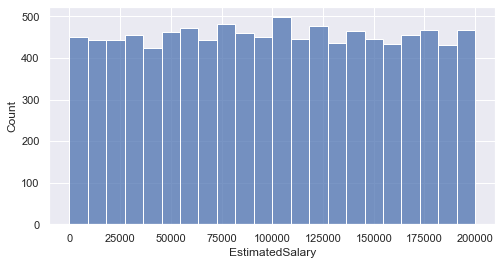

In [20]:
for col in nums:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.show()

In [21]:
# pip install plotly
import plotly.express as px

In [22]:
for col in nums:
    fig = px.histogram(df,x=col,width=800,height=400)
    fig.show()

Observation:
    
    - CreditScore: almost normal distribution, excpet 850-854 - there are more customers
    - Age: right skewned, most customers have age b/w 20 to 60
    - Tenure: almost uniform distribution
    - Balance: atleast 36% of customers have 0 balance, rest have balance b/w 50k to 200k
    - NumOFProduct: 96% of customers have either 1 or 2 products: right skewed
    - EstimatedSalary: almost uniform distribution

#### Bivariate Analysis
    - analysing each variable against the target variable
    - numeric v/s numeric: scatterplot
    - numeric v/s categoric : distplot - continuous probability density distribution of numeric
    - categoric v.s categoric: barplot - discrete probabiltiy distribution

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



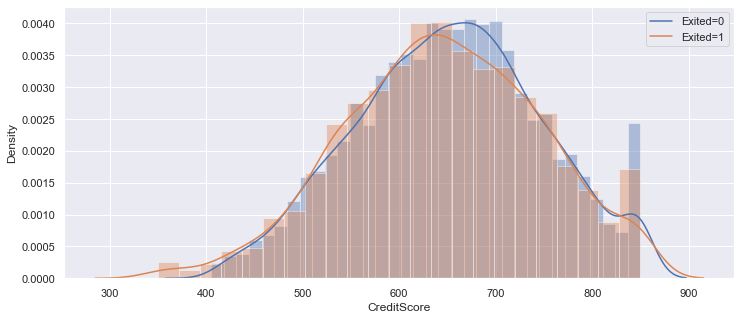

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



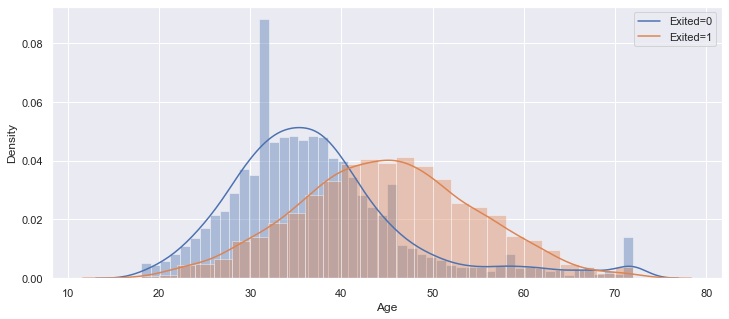

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



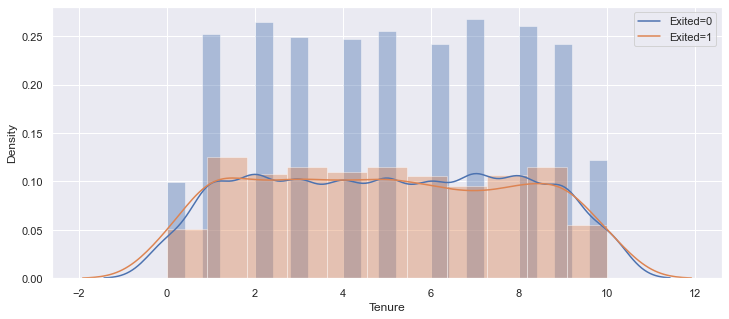

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



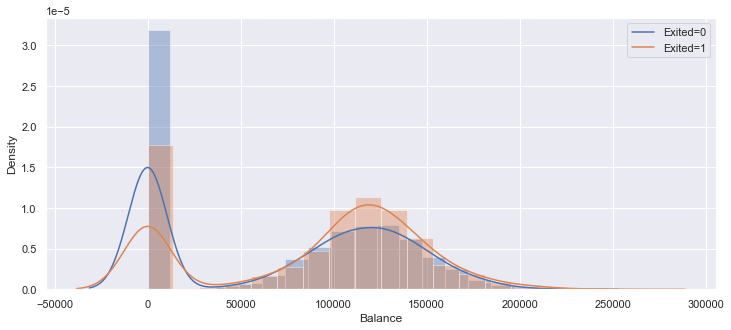

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



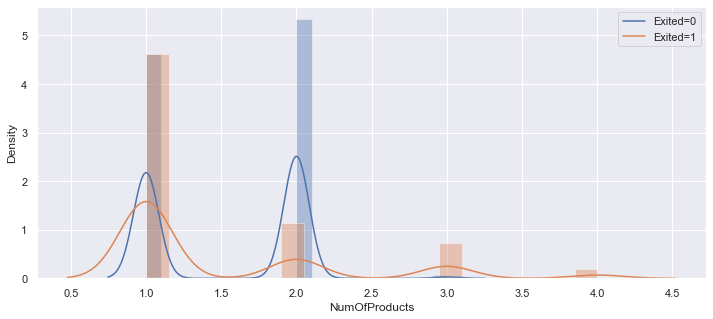

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



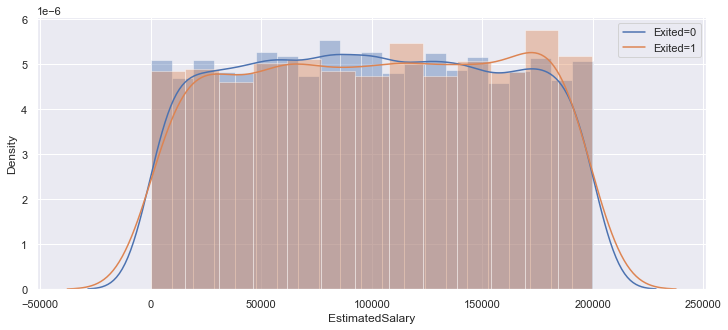

In [23]:
# numeric v/s categoric

for col in nums:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['Exited=0','Exited=1'])
    plt.show()

In [24]:
# categoric v/s categoric

In [25]:
# geography v/s exited
pivot = pd.crosstab(df.Geography,df.Exited,margins=True)
pivot

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000

In [26]:
pivot[1]/pivot['All']

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

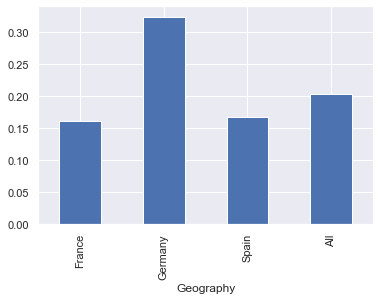

In [27]:
(pivot[1]/pivot['All']).plot(kind='bar')
plt.show()

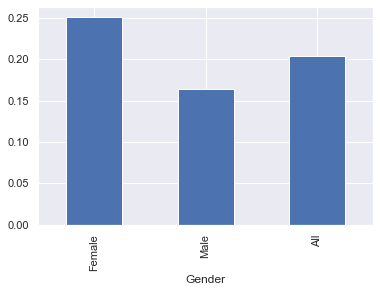

In [28]:
# Gender v/s exited
pivot = pd.crosstab(df.Gender,df.Exited,margins=True)
(pivot[1]/pivot['All']).plot(kind='bar')
plt.show()

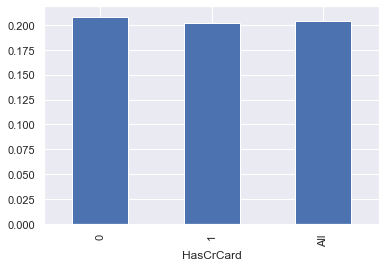

In [29]:
# HasCrCard v/s exited
pivot = pd.crosstab(df.HasCrCard,df.Exited,margins=True)
(pivot[1]/pivot['All']).plot(kind='bar')
plt.show()

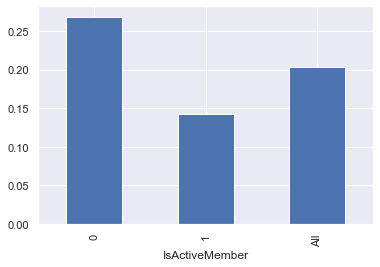

In [30]:
# IsActiveMember v/s exited
pivot = pd.crosstab(df.IsActiveMember,df.Exited,margins=True)
(pivot[1]/pivot['All']).plot(kind='bar')
plt.show()

### Multivariate Analysis

    - numeric v/s numeric v/s categoric - scatterplot
    - numeric v/s categoric v/s categoric - pointplot / boxplot / swarmplot

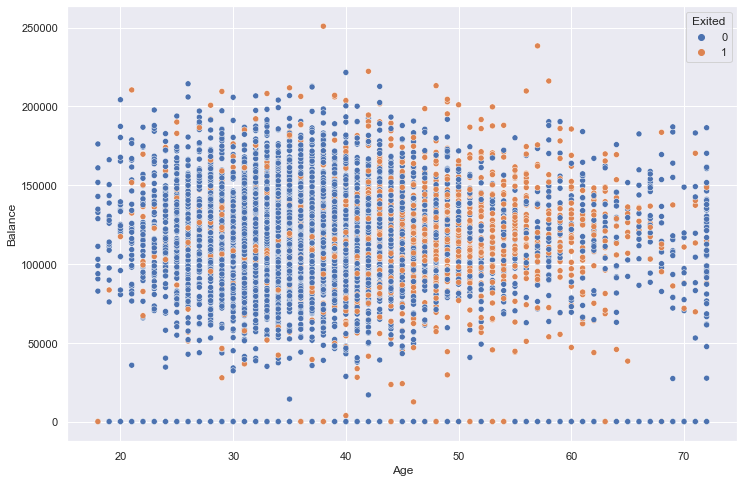

In [31]:
# age v/s balance v/s exited - scatterplot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='Balance',hue='Exited',data=df)
plt.show()

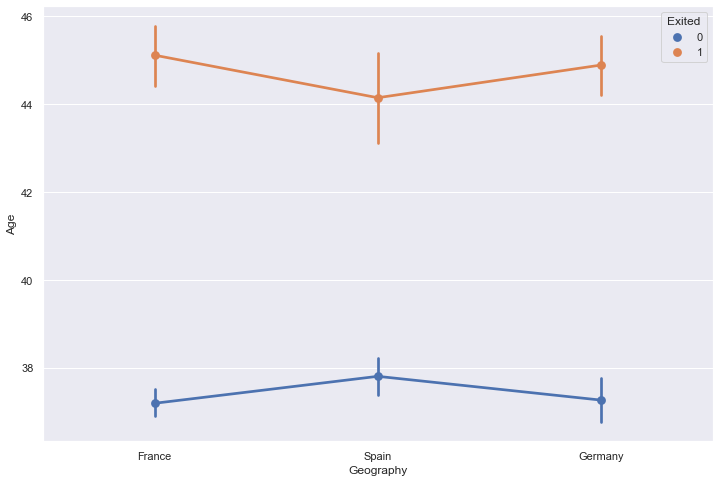

In [32]:
# Geography v/s Age v/s Exited - pointplot
plt.figure(figsize=(12,8))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

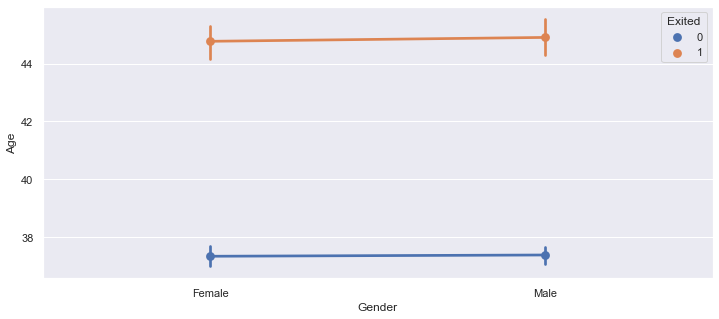

In [33]:
# Geography v/s Age v/s Exited - pointplot
plt.figure(figsize=(12,5))
sns.pointplot(x='Gender',y='Age',hue='Exited',data=df)
plt.show()

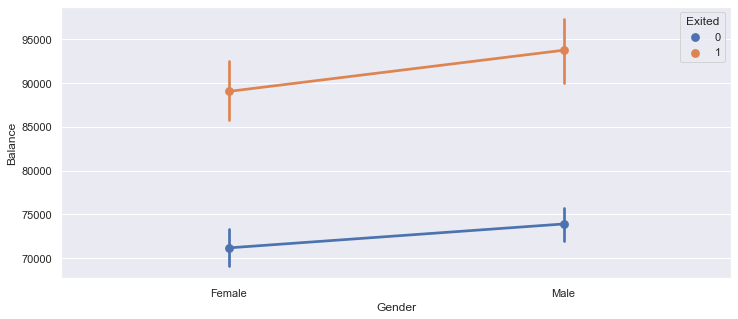

In [35]:
plt.figure(figsize=(12,5))
sns.pointplot(x='Gender',y='Balance',hue='Exited',data=df)
plt.show()

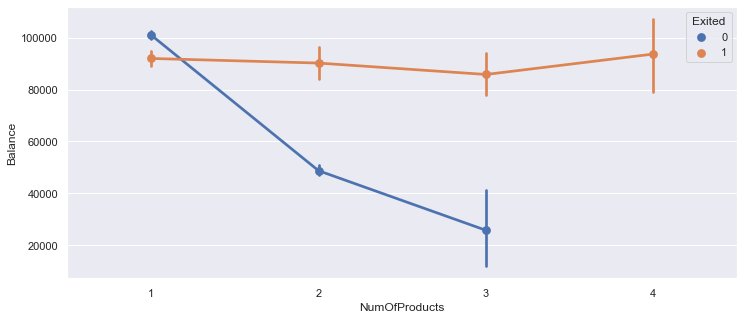

In [36]:
plt.figure(figsize=(12,5))
sns.pointplot(x='NumOfProducts',y='Balance',hue='Exited',data=df)
plt.show()

In [41]:
# parallel coordinate chart
df2 = df[['Age','Balance','NumOfProducts','Exited']][df['IsActiveMember']==1]
fig = px.parallel_coordinates(df2,color='Exited')
fig.show()

In [42]:
# sunburst chart
fig = px.sunburst(df,color='Exited',path=['Exited','Gender','Geography','IsActiveMember','NumOfProducts'])
fig.show()

### Statistical Research

#### Correlation Analysis

In [43]:
cor = df.corr()
cor

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.004727  0.001164  0.006268       0.012238   
Age                -0.004727  1.000000 -0.010561  0.029449      -0.030953   
Tenure              0.001164 -0.010561  1.000000 -0.012565       0.014004   
Balance             0.006268  0.029449 -0.012565  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030953  0.014004 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011637  0.022343 -0.014858       0.003183   
IsActiveMember      0.025651  0.083484 -0.028704 -0.010084       0.009612   
EstimatedSalary    -0.001101 -0.007166  0.006989  0.012377       0.013985   
Exited             -0.027094  0.290878 -0.014167  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001101 -0.027094  
Age              -0.011637        0.083484        -0.007166  0.290878  
Tenure            0.022343       -0.028704         0.006989 -0.014167  
Balance          -0.014858       -0.010084         0.012377  0.118533  
NumOfProducts     0.003183        0.009612         0.013985 -0.047820  
HasCrCard         1.000000       -0.011866        -0.010307 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.010813 -0.156128  
EstimatedSalary  -0.010307       -0.010813         1.000000  0.012503  
Exited           -0.007138       -0.156128         0.012503  1.000000

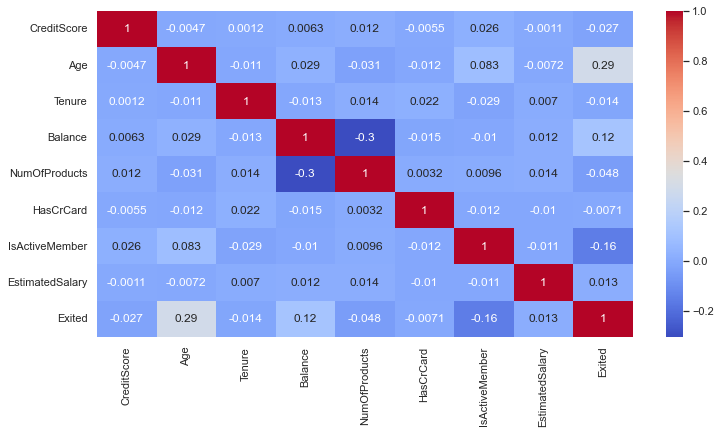

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

### ANOVA (f test)- Analysis of variance 

    - used to compare mean/distribution of a numeric attribute across multiple groups
    
    - Here it can be used to compare distribution of CreditScore across mulitple groups - Exited=0 and Exited=1

    Null Hypothesis: (business belief) - means of a numeric attribute across multiple groups is similar

    Null Hypothesis: distribution of CreditScore across multiple groups (exited = 0 and exited=1) is similar


- for any hypothesis testing scenario, we need to come up with a  business confidence (confidence interval) CI = 95%

- significance level, alpha = 1 - CI = 1 - 0.95 = 0.05

when you apply ANOVA or any other test, you will get pvalue

    if pvalue > alpha = we accept null hypothesis - feature is not important/informative
    if pvalue < alpha = we reject the null hypothesis - feature is important / informative

In [47]:
nums= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
xnum = df[nums]
y = df.Exited
xnum.head(2)

CreditScore  Age  Tenure   Balance  NumOfProducts  EstimatedSalary
0          619   42     2.0      0.00              1        101348.88
1          608   41     1.0  83807.86              1        112542.58

In [48]:
from sklearn.feature_selection import f_classif
fscore, pvalue = f_classif(xnum,y)
for i in range(len(nums)):print(nums[i],pvalue[i])

CreditScore 0.006738213892258643
Age 3.210618658489915e-194
Tenure 0.1565917661952313
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.21124537599025905


### Chi Square test - categoric v/s categoric 

    - used to compare distribution of a categoric attribute across multiple groups
    
    - Here it can be used to compare distribution of Gender across mulitple groups - Exited=0 and Exited=1

    Null Hypothesis: (business belief) - distribution of a categoric attribute across multiple groups is similar

    Null Hypothesis: distribution of Gender across multiple groups (exited = 0 and exited=1) is similar


- for any hypothesis testing scenario, we need to come up with a  business confidence (confidence interval) CI = 95%

- significance level, alpha = 1 - CI = 1 - 0.95 = 0.05

when you apply ANOVA or any other test, you will get pvalue

    if pvalue > alpha = we accept null hypothesis - feature is not important/informative
    if pvalue < alpha = we reject the null hypothesis - feature is important / informative

In [50]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
xcat = df[cats]
y = df.Exited
xcat.head()

Geography  Gender  HasCrCard  IsActiveMember
0    France  Female          1               1
1     Spain  Female          0               1
2    France  Female          1               0
3    France  Female          0               0
4     Spain  Female          1               1

In [51]:
from sklearn.preprocessing import LabelEncoder
xcat.Geography = LabelEncoder().fit_transform(xcat.Geography)
xcat.Gender = LabelEncoder().fit_transform(xcat.Gender)
xcat.head()

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Geography  Gender  HasCrCard  IsActiveMember
0          0       0          1               1
1          2       0          0               1
2          0       0          1               0
3          0       0          0               0
4          2       0          1               1

In [52]:
from sklearn.feature_selection import chi2
chiscore,pvalue = chi2(xcat,y)

for i in range(len(cats)):print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27
